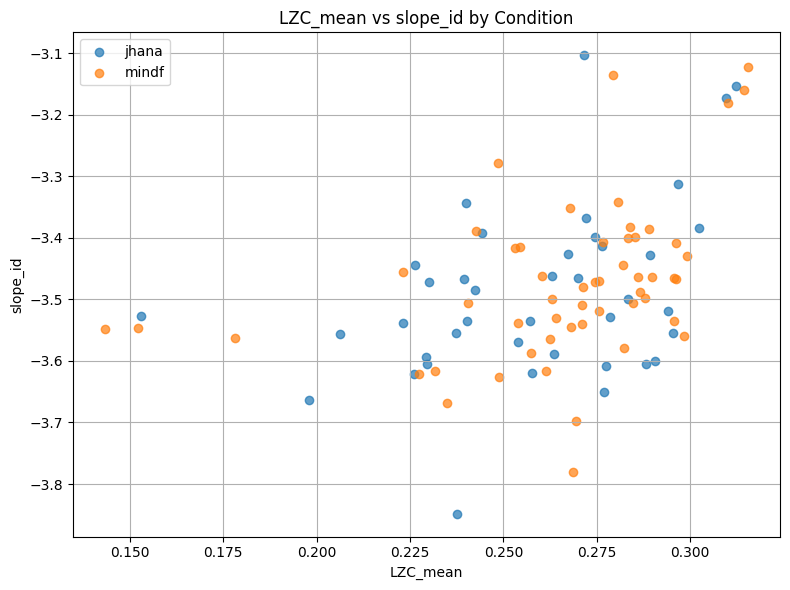

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("summary_COMPLETE.csv")

# Filter rows where condition is 'jhana' or 'mindf'
filtered_df = df[df['condition'].isin(['jhana', 'mindf'])]

# Create scatter plot
plt.figure(figsize=(8, 6))
for condition in ['jhana', 'mindf']:
    subset = filtered_df[filtered_df['condition'] == condition]
    plt.scatter(subset['LZC_mean'], subset['slope_id'], label=condition, alpha=0.7)

# Plot customization
plt.xlabel('LZC_mean')
plt.ylabel('slope_id')
plt.title('LZC_mean vs slope_id by Condition')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


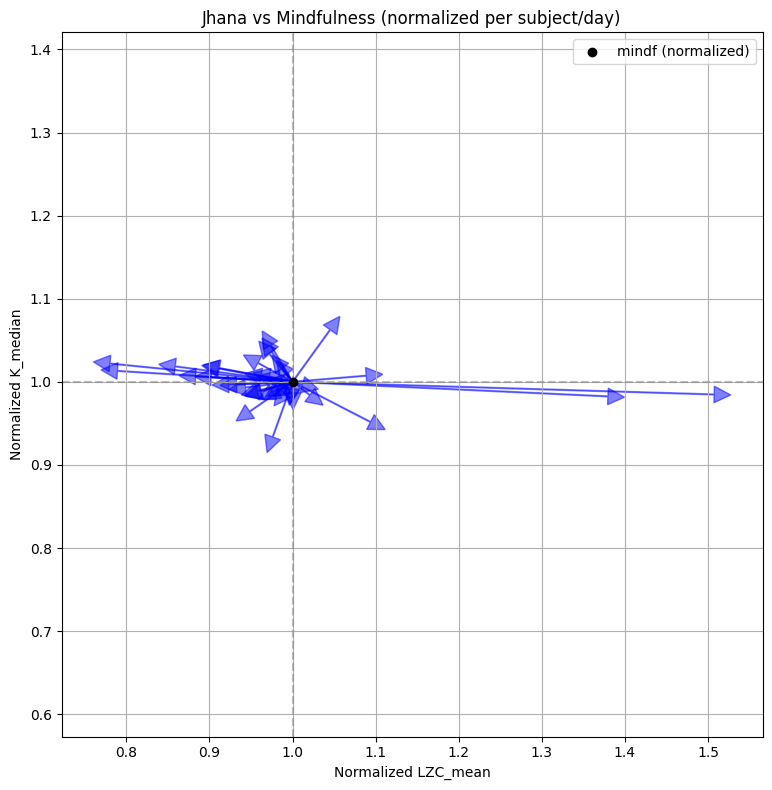

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("summary_COMPLETE.csv")

# Filter for jhana and mindf conditions only
df_filtered = df[df['condition'].isin(['jhana', 'mindf'])]

# Create a figure
plt.figure(figsize=(8, 8))

# Go through all pairs of (sub, day)
paired_groups = df_filtered.groupby(['sub', 'day'])

for (sub, day), group in paired_groups:
    if len(group) != 2:
        continue  # Skip incomplete pairs

    try:
        mindf_row = group[group['condition'] == 'mindf'].iloc[0]
        jhana_row = group[group['condition'] == 'jhana'].iloc[0]

        # Normalize Jhana values relative to Mindfulness
        norm_LZC = jhana_row['LZC_mean'] / mindf_row['LZC_mean']
        norm_K = jhana_row['K_median'] / mindf_row['K_median']

        # Plot arrow from (1,1) to (norm_LZC, norm_K)
        plt.arrow(1, 1, norm_LZC - 1, norm_K - 1, 
                  head_width=0.02, head_length=0.02, 
                  fc='blue', ec='blue', alpha=0.5)

    except IndexError:
        # Skip if either condition is missing
        continue

# Plot formatting
plt.axhline(1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(1, color='gray', linestyle='--', alpha=0.5)
plt.scatter(1, 1, color='black', label='mindf (normalized)', zorder=5)
plt.xlabel('Normalized LZC_mean')
plt.ylabel('Normalized K_median')
plt.title('Jhana vs Mindfulness (normalized per subject/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.axis('equal')
plt.show()
